# English Wikipedia page views
## Sample API code
This code is made available for re-use under a [CC0 license](https://creativecommons.org/share-your-work/public-domain/cc0/). 

This is based on [a notebook](https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb) by Jonathan Morgan at UW-Seattle. 

In [5]:
!type pip

pip is /Users/lukenguyen/Documents/projects/DSC180A_B02_F21/env/bin/pip


In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

/Users/lukenguyen/Documents/projects/DSC180A_B02_F21/env/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [5]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2019010100", #YYYYMMDDHH
                    "end" :   '2021090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/staeiou',
    'From': 'stuart@stuartgeiger.com'
}

In [3]:
def api_call(endpoint,parameters):
    print(endpoint.format(**parameters))
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response


In [39]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/all-access/user/daily/2019010100/2021090100


In [12]:
example_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010100',
  'views': 258432938},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010200',
  'views': 269669563},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010300',
  'views': 262928832},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010400',
  'views': 257655473},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010500',
  'views': 258422861}]

In [13]:
df = pd.DataFrame(example_monthly_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,user,daily,2019010100,258432938
1,en.wikipedia,all-access,user,daily,2019010200,269669563
2,en.wikipedia,all-access,user,daily,2019010300,262928832
3,en.wikipedia,all-access,user,daily,2019010400,257655473
4,en.wikipedia,all-access,user,daily,2019010500,258422861
...,...,...,...,...,...,...
970,en.wikipedia,all-access,user,daily,2021082800,233546365
971,en.wikipedia,all-access,user,daily,2021082900,252084967
972,en.wikipedia,all-access,user,daily,2021083000,248667495
973,en.wikipedia,all-access,user,daily,2021083100,239193347


In [14]:
df = df[['timestamp','views']]

In [15]:
pd.to_datetime(df['timestamp'], format="%Y%m%d00")

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
970   2021-08-28
971   2021-08-29
972   2021-08-30
973   2021-08-31
974   2021-09-01
Name: timestamp, Length: 975, dtype: datetime64[ns]

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

/var/folders/67/t0h0bk393p9_1pnmjpy9q4yh0000gn/T/ipykernel_17294/3663965738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2019-01-01,258432938
2019-01-02,269669563
2019-01-03,262928832
2019-01-04,257655473
2019-01-05,258422861
...,...
2021-08-28,233546365
2021-08-29,252084967
2021-08-30,248667495


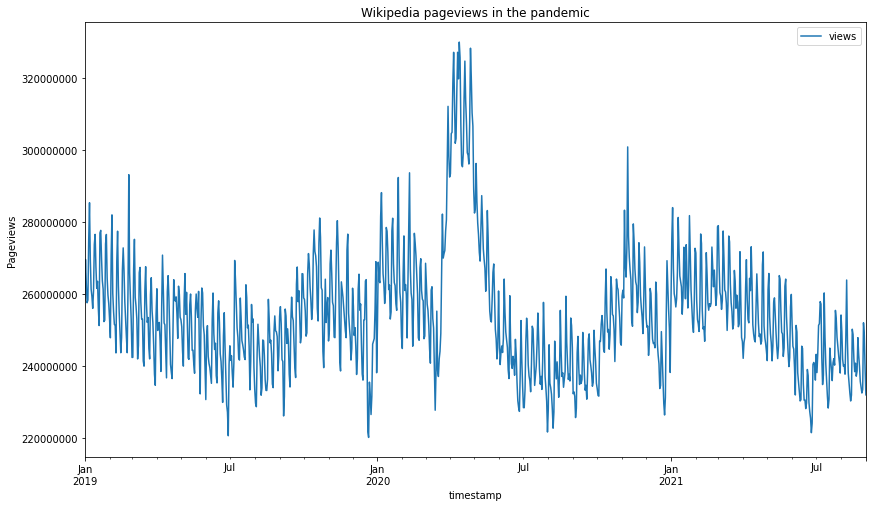

In [17]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

## 1. Pageviews for an article of your choice on English Wikipedia, plotted daily, for the calendar year 2020

In [51]:
endpoint_pg_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'
pg_params = {
    "project" : "en.wikipedia.org",
    "access" : "all-access",
    "agent" : "user",
    "article": "Foo",
    "granularity" : "daily",
    "start" : "20200101", #YYYYMMDD
    "end" :   '20201231',
}

example_monthly_pageviews = api_call(endpoint_pg_pageviews, pg_params)
example_monthly_pageviews['items'][:2]

https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/user/Foo/daily/20200101/20201231


[{'project': 'en.wikipedia',
  'article': 'Foo',
  'granularity': 'daily',
  'timestamp': '2020010100',
  'access': 'all-access',
  'agent': 'user',
  'views': 6365},
 {'project': 'en.wikipedia',
  'article': 'Foo',
  'granularity': 'daily',
  'timestamp': '2020010200',
  'access': 'all-access',
  'agent': 'user',
  'views': 6357}]

In [52]:
df1 = pd.DataFrame(example_monthly_pageviews['items'])
df1.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Foo,daily,2020010100,all-access,user,6365
1,en.wikipedia,Foo,daily,2020010200,all-access,user,6357
2,en.wikipedia,Foo,daily,2020010300,all-access,user,6388
3,en.wikipedia,Foo,daily,2020010400,all-access,user,6411
4,en.wikipedia,Foo,daily,2020010500,all-access,user,6411


In [65]:
df1 = df1[['timestamp','views']]
pd.to_datetime(df1['timestamp'], format="%Y%m%d00")
df1 = df1.set_index('timestamp')
df1.head()

,views
timestamp,
2020-01-01,6365
2020-01-02,6357
2020-01-03,6388
2020-01-04,6411
2020-01-05,6411


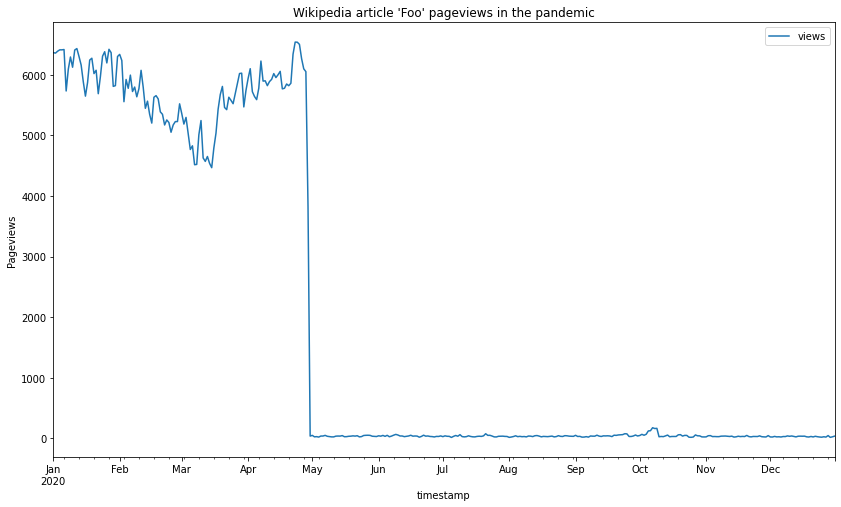

In [67]:
fig = df1.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia article 'Foo' pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
# plt.savefig("pageviews.pdf", dpi=300)

## 2. All pageviews to English Wikipedia, plotted monthly, for 2017-2020: 

### 2a. For mobile web devices only 

https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/mobile-web/user/monthly/2017010100/2020010100


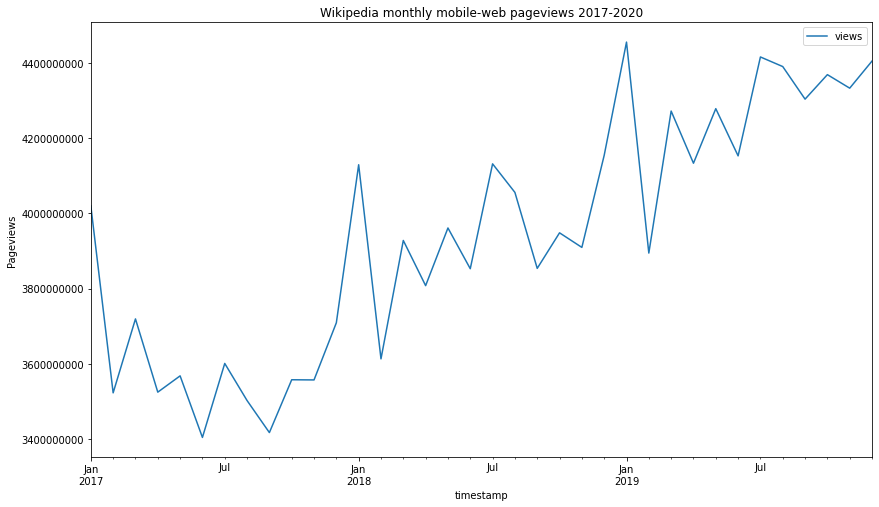

In [70]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
df2a = pd.DataFrame(example_monthly_pageviews['items'])
df2a = df2a[['timestamp','views']]
df2a['timestamp'] = pd.to_datetime(df2a['timestamp'], format="%Y%m%d00").copy()
df2a = df2a.set_index('timestamp')

fig = df2a.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia monthly mobile-web pageviews 2017-2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

### 2b. For desktop devices only 

https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/desktop/user/monthly/2017010100/2020010100


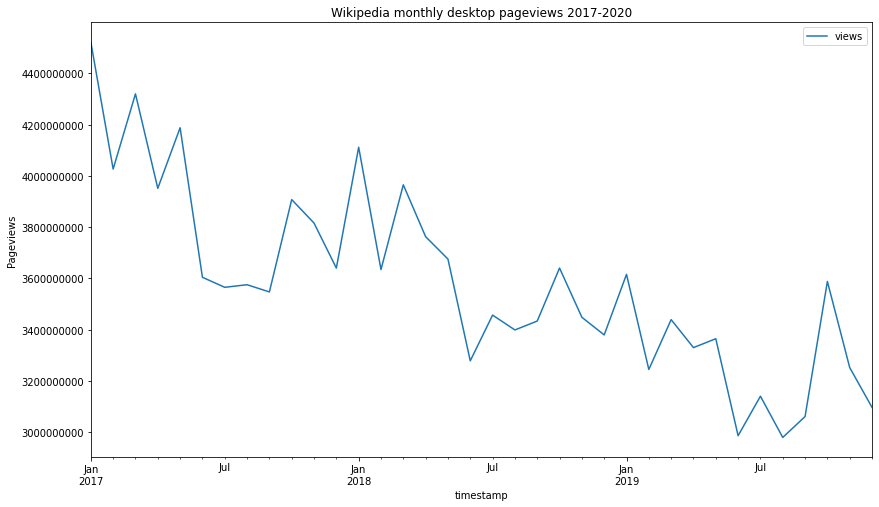

In [73]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
df2a = pd.DataFrame(example_monthly_pageviews['items'])
df2a = df2a[['timestamp','views']]
df2a['timestamp'] = pd.to_datetime(df2a['timestamp'], format="%Y%m%d00").copy()
df2a = df2a.set_index('timestamp')

fig = df2a.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title(f"Wikipedia {example_params_pageviews['granularity']} {example_params_pageviews['access']} pageviews 2017-2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

### 2c. For web spiders (aka crawlers/scrapers) only

https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/all-access/spider/monthly/2017010100/2020010100


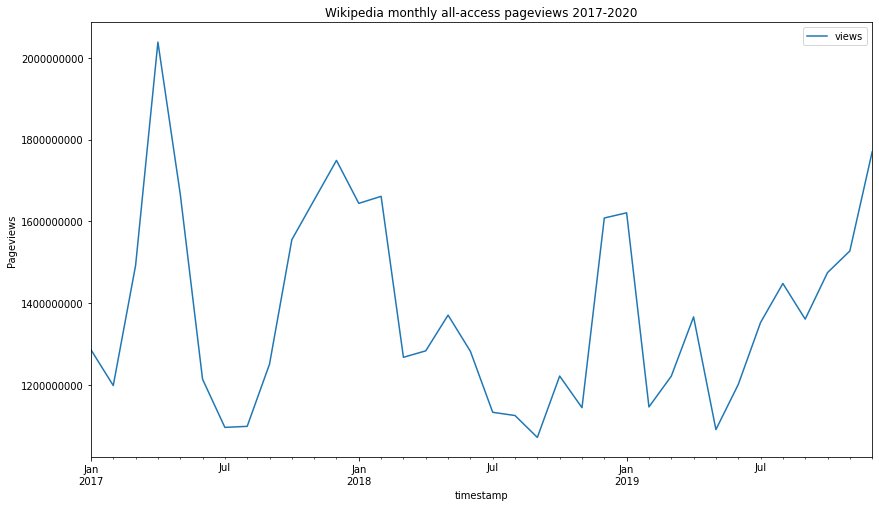

In [75]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "spider",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
df2a = pd.DataFrame(example_monthly_pageviews['items'])
df2a = df2a[['timestamp','views']]
df2a['timestamp'] = pd.to_datetime(df2a['timestamp'], format="%Y%m%d00").copy()
df2a = df2a.set_index('timestamp')

fig = df2a.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title(f"Wikipedia {example_params_pageviews['granularity']} {example_params_pageviews['access']} pageviews 2017-2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

## 3. The top 10 most viewed articles on the same day of your choice, in at least five different language versions of Wikipedia (only needs to be a simple table or list, not a visualization)

In [20]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/{project}/{access}/{year}/{month}/{day}'

for version in ["en.wikipedia.org", 'de.wikipedia.org', 'es.wikipedia.org', 'it.wikipedia.org', 'nl.wikipedia.org']:
    example_params_pageviews = {
                        "project" : version,
                        "access" : "all-access",
                        "year" : "2020",
                        "month" : "11", 
                        "day" :   '11'
                            }

    most_viewed = api_call(endpoint_pageviews, example_params_pageviews)
    df2a = pd.DataFrame(most_viewed['items'][0]['articles'][:10])
    print(df2a)

https://wikimedia.org/api/rest_v1/metrics/pageviews/top/en.wikipedia.org/all-access/2020/11/11
                                    article    views  rank
0                                 Main_Page  6295706     1
1                              Donald_Trump  4237708     2
2                            Special:Search  1423854     3
3  2020_United_States_presidential_election   406534     4
4                                 Joe_Biden   367475     5
5                             Kamala_Harris   328915     6
6                                 Azad_Hind   318491     7
7           The_Queen's_Gambit_(miniseries)   259460     8
8                              Veterans_Day   188394     9
9                 Aligarh_Muslim_University   182334    10
https://wikimedia.org/api/rest_v1/metrics/pageviews/top/de.wikipedia.org/all-access/2020/11/11
                                             article    views  rank
0                               Wikipedia:Hauptseite  1331226     1
1                        

# Participation
## Describe one thing your struggled with doing your task. Try to be specific about what is causing you difficulty and why.
I struggled to get reliable results querying the API, sometimes this was due to incorrect parameters but other times because the API didn't have that data available, i.e. no data on an article for a certain time period.